# **IMAGE COMPARAISON TECHNIQUES**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# **1. PIXEL TOLERANCE:**

In this technique, find the maximum number of dissimilar pixels between two apparently similar pictures.

If (number of dissimilar pixels  <=  pixel tolerance)   then   pictures are identical.


**Strengths:**

Easy to implement and very fast.

Useful for situations where pixel-perfect accuracy is required.


**Limitations:**

Sensitive to even minor changes, such as noise.

It may mark images as entirely different if they have slight lighting changes, making it less robust for real-world or natural image comparison.

Pixel similarity: 0.025019268009922217


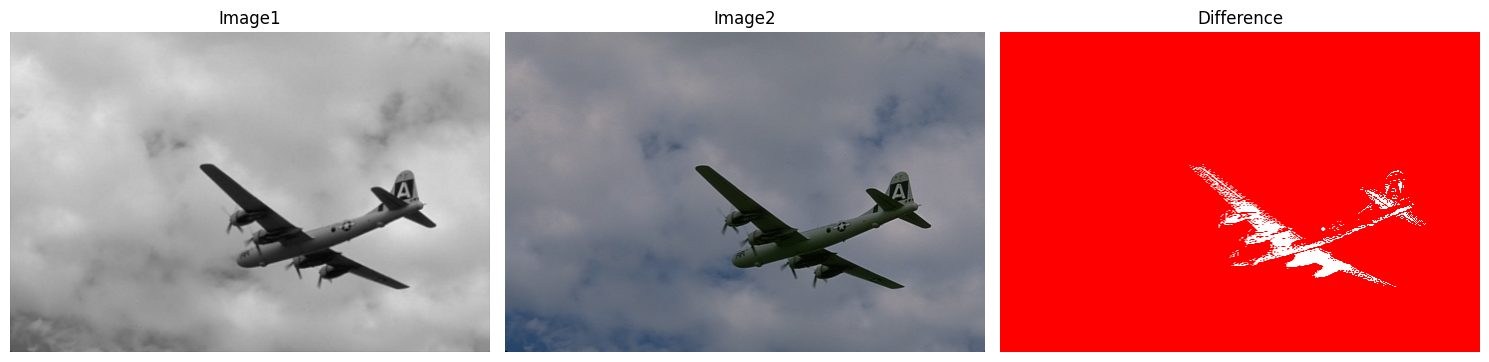

In [5]:
image = cv2.imread('1.jpg')
gray_image = cv2.imread('1-gray.jpg')

height, width = image.shape[:2]
gray_image = cv2.resize(gray_image, (width, height))


# Ensure both images are of the same size
if gray_image.shape != image.shape:
    print("Images must have the same dimensions!")
    exit()

# Define a pixel tolerance value
tolerance = 10

# Compute the absolute difference between the two images
diff = cv2.absdiff(gray_image, image)

# Convert the difference to grayscale for thresholding
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale difference image based on the tolerance value
_, threshold_diff = cv2.threshold(diff, tolerance, 255, cv2.THRESH_BINARY)

# Calculate the number of pixels that are different
non_zero_count = np.count_nonzero(threshold_diff)

# Calculate total number of pixels in the image
total_pixels = image.shape[0] * image.shape[1]

# Calculate similarity percentage (similar pixels are those below the tolerance threshold)
similarity = ((total_pixels - non_zero_count) / total_pixels)

print(f"Pixel similarity: {similarity}")

# Highlighting The Difference, set the red pixels where there is a difference
white_background = np.ones_like(image) * 255
red_highlight = np.zeros_like(image)
red_highlight[threshold_diff != 0] = [0, 0, 255]
diff_colored = white_background.copy()
diff_colored[threshold_diff != 0] = [0, 0, 255]

# Visualization with Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display expected image
ax[0].imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image1')
ax[0].axis('off')

# Display actual image
ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image2')
ax[1].axis('off')

# Display the difference with the red highlights
ax[2].imshow(cv2.cvtColor(diff_colored, cv2.COLOR_BGR2RGB))
ax[2].set_title('Difference')
ax[2].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


# **2. SSIM : Structural Similarity Index**

SSIM is a widely used metric that assesses the structural similarity between two images. It considers luminance, contrast, and structure, giving a score between -1 (dissimilar) and 1 (identical).

**Strengths:**

Robust against small lighting changes, compression, or noise.

More closely matches how humans perceive image differences, so it’s preferred when we need to compare overall image quality.

**Limitations:**

It may miss small pixel-level differences that could be critical in some tasks.

Not ideal for binary image comparison where exact pixel matches are needed.





SSIM value: 0.8954406096641282


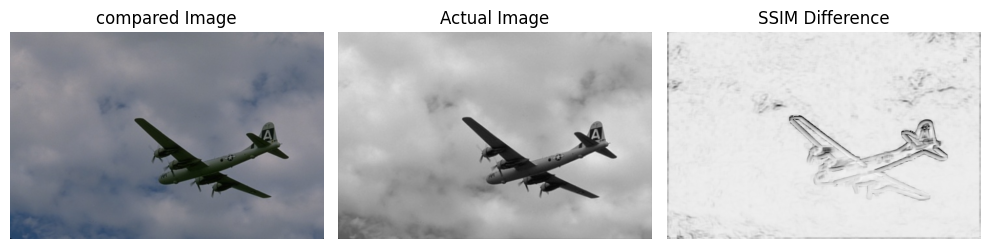

In [9]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Load images
gray_image = cv2.imread('1.jpg')
image = cv2.imread('1-gray.jpg')

height, width = image.shape[:2]
gray_image = cv2.resize(gray_image, (width, height))

# Convert the images to grayscale
gray_gray = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(ssim_value, diff) = ssim(gray_gray, gray, full=True)
print("SSIM value:", ssim_value)

# Normalize the difference image for better visualization
diff = (diff * 255).astype("uint8")

# Display the images and their SSIM difference
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('compared Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Actual Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.title('SSIM Difference')
plt.axis('off')

plt.tight_layout()
plt.show()


# **3. SIFT : Scale-Invariant Feature Transform**

A Powerful method for image comparison and matching. It is widely used in computer vision to detect and describe local features in images, making it especially useful when images have transformations like scaling, rotation, or partial occlusions.


The SIFT algorithm is designed to detect distinctive features, called keypoints, in images. These keypoints are unique areas that can be used to recognize objects in different images, even if the image is scaled, rotated, or slightly changed. Following are the main steps in the SIFT algorithm:

1.Scale-space Extrema Detection

2.Keypoint Localization

3.Orientation Assignment

4.Keypoint Descriptor



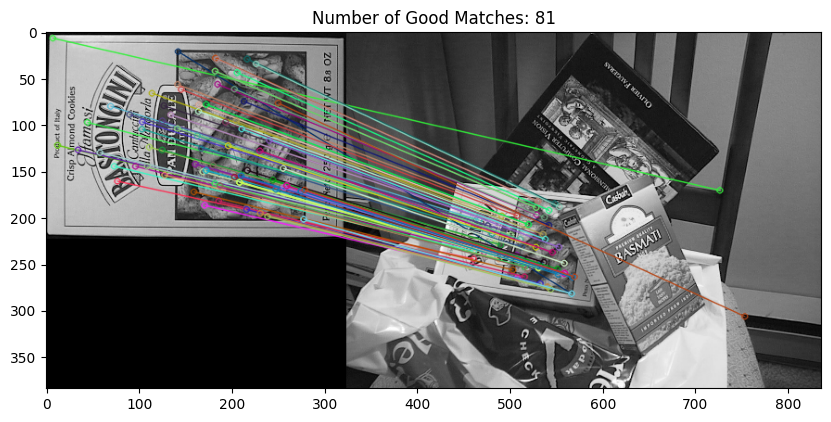

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images for comparison
image1 = cv2.imread('sift1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('sift2.png', cv2.IMREAD_GRAYSCALE)


# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Number of checks in the search tree
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors using KNN (k-nearest neighbors)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to retain good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Ratio test
        good_matches.append(m)

# Draw matches between the images
result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matching result
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.title(f"Number of Good Matches: {len(good_matches)}")
plt.show()
